In [1]:
# Importing necessary classes
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math

In [2]:
# Import Input File
df = pd.read_csv('./input/RealEstate.csv')
df = df.dropna()
df = df[['Size','Price']]
df.columns = ['x', 'y']

In [3]:
from sklearn.model_selection import train_test_split
# create training and testing vars
train, test = train_test_split(df, test_size=0.2)

In [4]:
# Import Input File
#train=pd.read_csv('./input/train.csv')
#test=pd.read_csv('./input/test.csv')

# Delete Observations with Missing Values
#train=train.dropna()
#test=test.dropna()

In [5]:
# Separate Independent and Dependent Variables
x_train = train.as_matrix(['x'])
y_train = train.as_matrix(['y'])
x_test = test.as_matrix(['x'])
y_test = test.as_matrix(['y'])

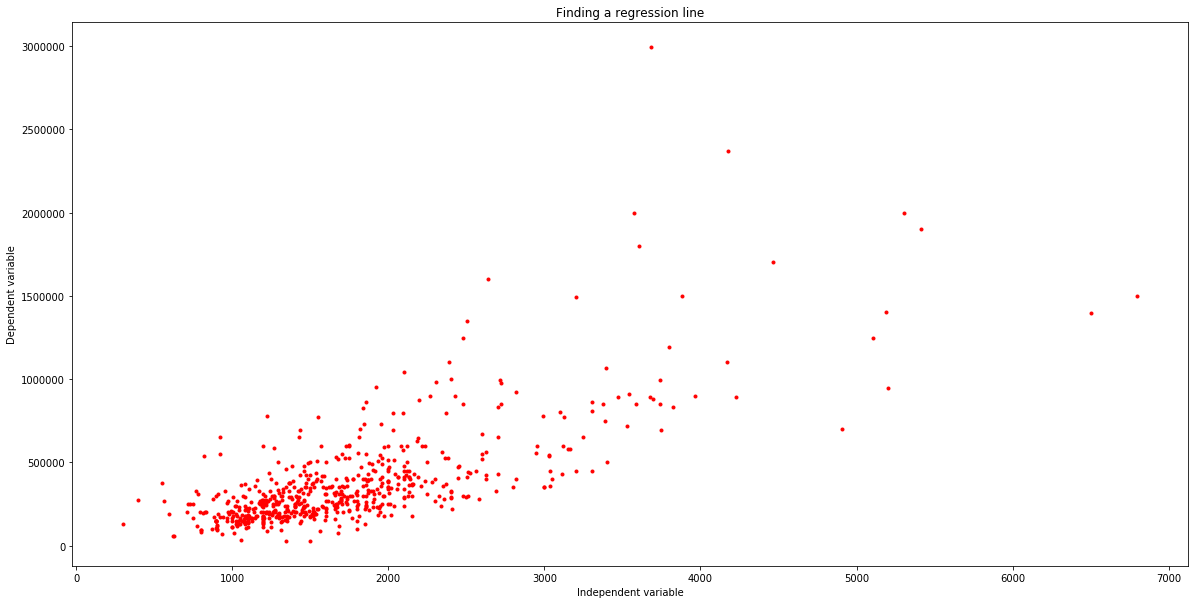

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(x_train, y_train, color='red', marker='.')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Finding a regression line')
plt.savefig('./images/train_data')
plt.show()

You can see that the dependent variable has a linear distribution with respect to the independent variable.

### Statistical Terms ###

**Regression Equation**: the equation of the best-fitting line through a set of data.

It describes the relationship between two variables and is in the form: 
$$ Y' = m*X + c   \tag{1}$$

where m is the coefficient of independent variable (slope) and c is the Y-intercept.

**Slope**: a number measuring the steepness of a line relative to the x-axis.
The slope of a line is usually calculated by dividing the amount of change in Y by the amount of change in X. The slope of the regression line can be calculated by dividing the covariance of X and Y by the variance of X.

The mathematical formula to calculate slope (m) is:
$$ slope = covariance / variance  \tag{2}$$

**Covariance**: a measure of how much two variables change with respect to one another.

The mathematical formula to calculate covariance is: 
$$ covariance = mean(x*y) - mean(x) * mean(y)  \tag{3}$$

**Variance**: a statistic used to describe the spread of data about the mean.

The mathematical formula to calculate variance is: 
$$ variance = mean( x^2) - mean (x)^2  \tag{4}$$

**Y-intercept**: the point at which a line crosses the Y-axis.

The formula to calculate intercept (c) is: 
$$ c = mean(y) – mean(x) * m  \tag{5}$$

Check the video link below for more information on the equation and derivation.

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/covariance-and-the-regression-line

Now, let’s write a function for intercept and slope (coefficient):

In [7]:
def variance(x):
    return (np.mean(x**2) - np.mean(x)**2)

In [8]:
variance(x_train)

652698.63449211046

We can use numpy inbuilt fucntion "var" to calculate variance

In [9]:
np.var(x_train)

652698.63449211046

In [10]:
def covariance(x,y):
    return (np.mean(x*y) - (np.mean(x)*np.mean(y)))

In [11]:
covariance(x_train, y_train)

181993511.58502829

We can use numpy inbuilt fucntion "cov" to calculate covariance

In [12]:
np.cov(train['x'], train['y'], bias=True)

array([[  6.52698634e+05,   1.81993512e+08],
       [  1.81993512e+08,   9.30429021e+10]])

The 2x2 array returned by np.cov(x,y) has elements equal to



$$[ cov(x,x)  | cov(x,y)   ]$$
$$[ cov(x,y)  |  cov(y,y)  ]$$


Note: covariance(x,x) is nothing but the variance(x)

In [13]:
def get_slope_intercept(x,y):

    # Calculate slope
    m = covariance(x,y)/variance(x)   
    # Round the results to 2 decimal places
    m = round(m,2)
    
    # Calculate intercept
    b = (np.mean(y) - np.mean(x)*m)
    # Round the results to 2 decimal places
    b = round(b,2)
    
    return m,b

In [14]:
s, c = get_slope_intercept(x_train,y_train)
# Equation coefficient and Intercept
print("Slope : ", s)

print("Intercept : ", c)

Slope :  278.83
Intercept :  -113295.1


Let's draw a regression line using the calcualted slope and intercept

In [15]:
m,c = get_slope_intercept(x_train, y_train)
reg_line = [(m*x)+c for x in x_train]

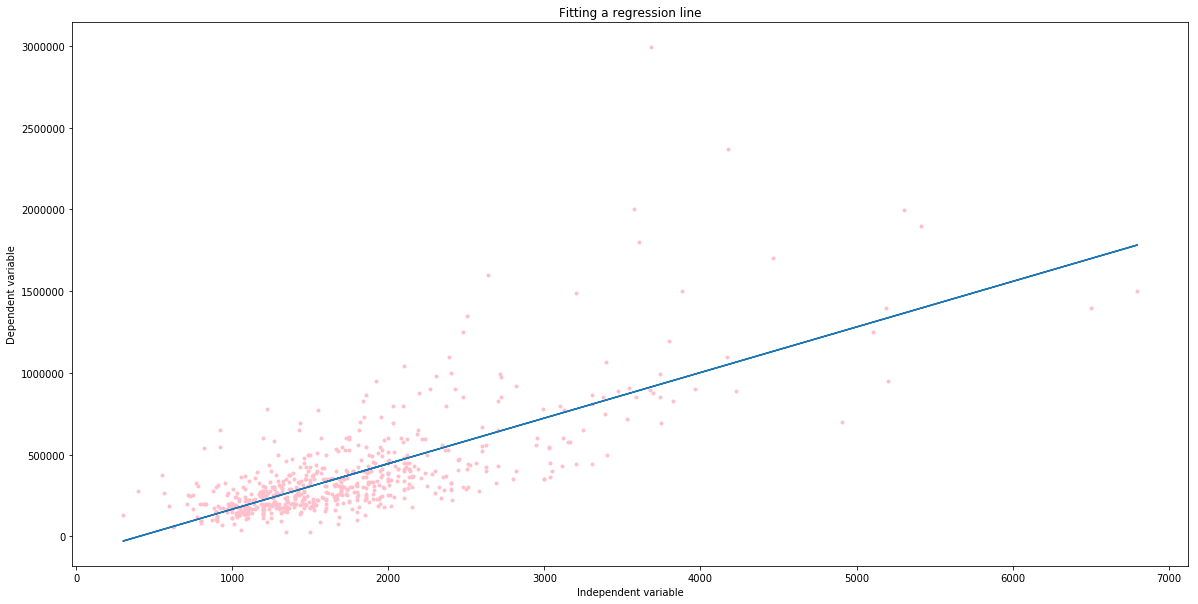

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(x_train, y_train, color='pink', marker='.')
plt.plot(x_train, reg_line)
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Fitting a regression line')
plt.savefig('./images/train_fit')
plt.show()

### Let's build a simple linear regression model based on our learning so far

In [17]:
# Simple linear regression model
class SimpleLinearRegression:
    
    def __init__(self):
        self.slope = 0
        self.intercept = 0
        # Indefendent variable
        self.x = []
        # Dependent variable
        self.y = []
        # Covariance
        self.cov = 0
        # Variance
        self.var = 0
        
    def calculate(self):

        # Calculate slope
        self.cov = (np.mean(self.x*self.y) - (np.mean(self.x)*np.mean(self.y)))
        self.var = (np.mean(self.x**2) - np.mean(self.x)**2)           
        self.slope = self.cov/self.var 
        self.slope = round(self.slope,2)

        # Calculate intercept, c = y - mx
        self.intercept = (np.mean(self.y) - np.mean(self.x)*self.slope)
        self.intercept = round(self.intercept,2)

    def fit(self, x, y):
        self.x = x
        self.y = y
        self.calculate()
    
    def predict(self, x):
        # y = m*x+b
        return (self.slope*x) + self.intercept
    

In [18]:
slm = SimpleLinearRegression()
slm.fit(x_train, y_train)

In [19]:
#Let's make some prediction
y_pred = slm.predict(x_test)

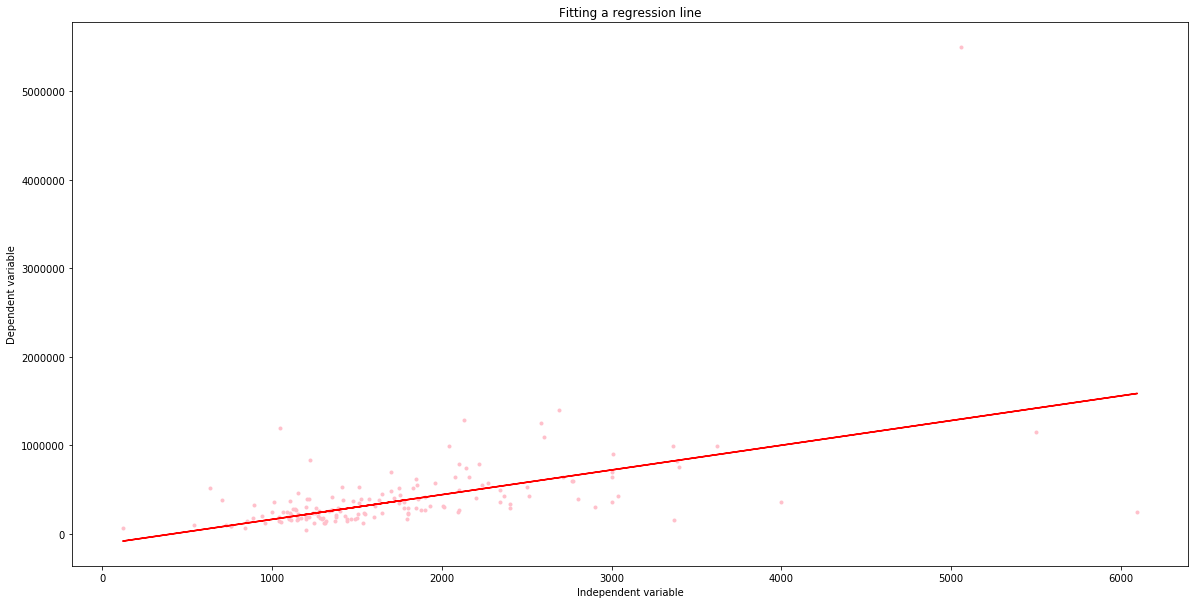

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(x_test, y_test, color='pink', marker='.')
plt.plot(x_test, y_pred, color='red')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.title('Fitting a regression line')
plt.savefig('./images/test_fit')
plt.show()

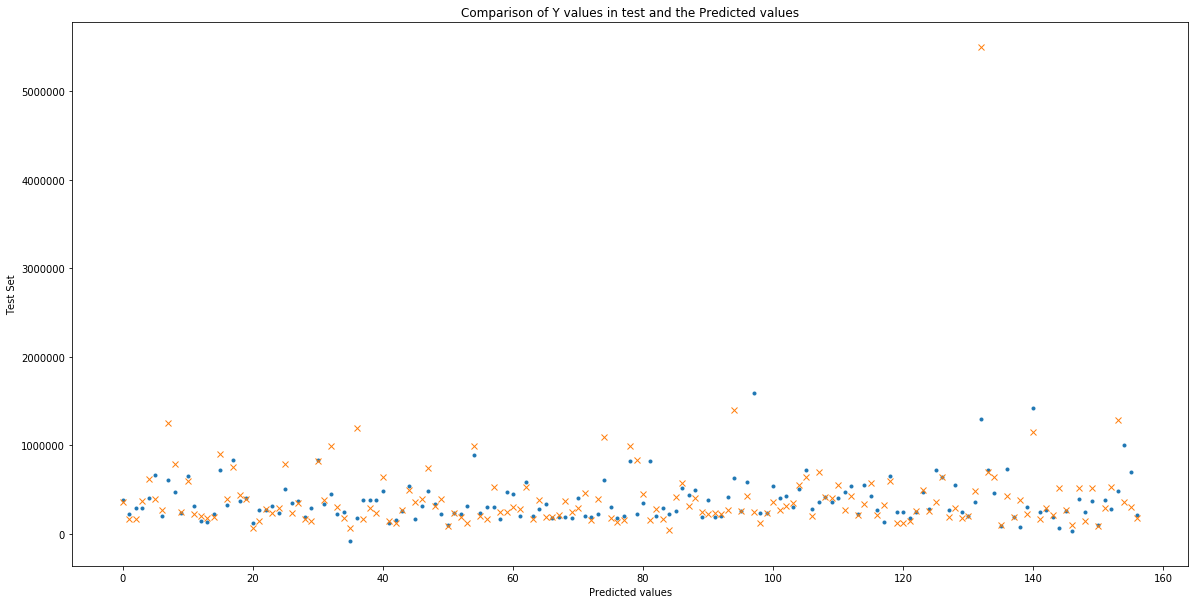

In [21]:
plt.figure(figsize=(20,10))
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(y_pred, '.', y_test, 'x')
plt.savefig('./images/predict')
plt.show()

### Root Mean Squared Error(RMSE)

RMSE is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are, and RMSE is a measure of how spread out these residuals are.

Let’s define a function for RMSE:

In [22]:
# squared_error
def se(y, y_hat):
    # error = (y-y_hat)**2
    return np.square(np.subtract(y, y_hat))

In [23]:
# sum_of_squared_error
def sse(y, y_hat):
    # error = (y-y_hat)**2
    return np.sum(se(y, y_hat))

In [24]:
# mean_squared_error
def mse(y, y_hat):
    return np.mean(se(y, y_hat))

In [25]:
# root_mean_squared_error
def rmse(y, y_hat):
    return np.sqrt(mse(y, y_hat))

### R-squared

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.

In [26]:
def r_squared(y, y_hat):
    y_mean_line = np.mean(y)
    squared_error_regression = sse(y, y_hat)
    squared_error_y_mean = sse(y, y_mean_line)
    return 1 - (squared_error_regression/squared_error_y_mean)

In [27]:
# The root mean squared error
print('Root Mean squared error: %.2f' % rmse(y_test, y_pred))
# The mean squared error
print('Mean squared error: %.2f' % mse(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R-Squared: %.2f' % r_squared(y_test, y_pred))
# and so the correlation is..
print('Correlation: %.2f' %  math.sqrt(r_squared(y_test, y_pred)))

Root Mean squared error: 412349.22
Mean squared error: 170031878133.74
R-Squared: 0.28
Correlation: 0.52


### Now lets perform the same operation using a python library

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [29]:
# Create Linear Regression Object and fit it to Train Dataset
lm = linear_model.LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# Equation coefficient and Intercept
print("Slope : ", lm.coef_)

print("Intercept : ", lm.intercept_)

Slope :  [[ 278.83237679]]
Intercept :  [-113299.28196633]


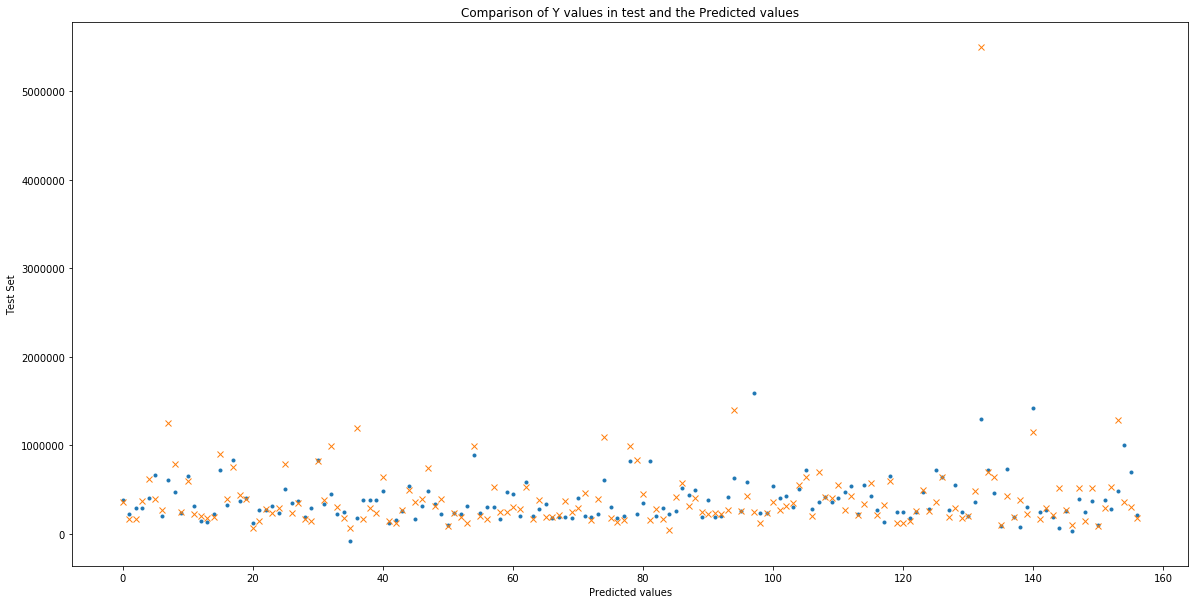

In [31]:
# So let's run the model against the test data
y_predicted = lm.predict(x_test)

plt.figure(figsize=(20,10))
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.plot(y_predicted, '.', y_test, 'x')
plt.show()

In [32]:
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_predicted))
# Have a look at R sq to give an idea of the fit 
print('R-Squared: %.2f' %lm.score(x_train,y_train))
# can also be calculated using r2_score
print('R-Squared: %.2f' % r2_score(y_test, y_predicted))
# and so the correlation is..
print('Correlation: %.2f' % math.sqrt(r2_score(y_test, y_predicted)))

Mean squared error: 170031811358.49
R-Squared: 0.55
R-Squared: 0.28
Correlation: 0.52


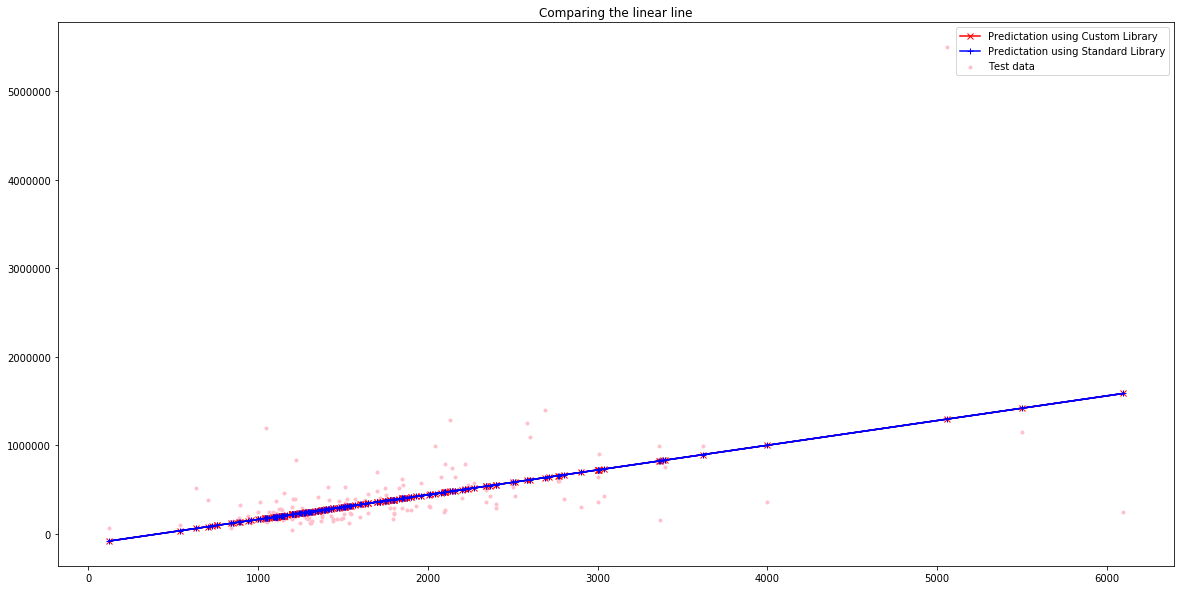

In [33]:
plt.figure(figsize=(20,10))
plt.scatter(x_test, y_test, color='pink', marker='.', label='Test data')
# Y_pred was calculated using functons built from scratch
plt.plot(x_test, y_pred, color='red', marker='x', label='Predictation using Custom Library')
# Y_pred was calculated using library functioins
plt.plot(x_test, y_predicted, color='blue',  marker='+', label='Predictation using Standard Library')

plt.title('Comparing the linear line')
plt.legend()
plt.savefig('./images/compare')
plt.show()